# Лабораторна робота 5 (2 частина)

Романенко Ілля ФІТ 4-7

23 варіант

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Крок 1

завантажуємо датасет Student_data.csv. в цьому випадку він збережений разом з нотбуком в одній директорії

In [2]:
filePath = './Student_data.csv'

dataFrame = pd.read_csv(filePath)

dataFrame.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Крок 2

виконаємо попередній аналіз данних

In [3]:
dataFrame.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [4]:
dataFrame.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [5]:
dataFrame.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
dataFrame.duplicated().sum()

0

In [7]:
dataFrame.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Дізнаємося кореляційний вектор відносно пареметру GPA

In [8]:
corr_vector = dataFrame.corr()['GPA'].sort_values(ascending=False)
print(corr_vector)

GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
StudentID           -0.002697
Gender              -0.013360
ParentalEducation   -0.035854
GradeClass          -0.782835
Absences            -0.919314
Name: GPA, dtype: float64


/tmp/ipykernel_20572/1544119368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_vector.index, y=corr_vector.values, palette='coolwarm')


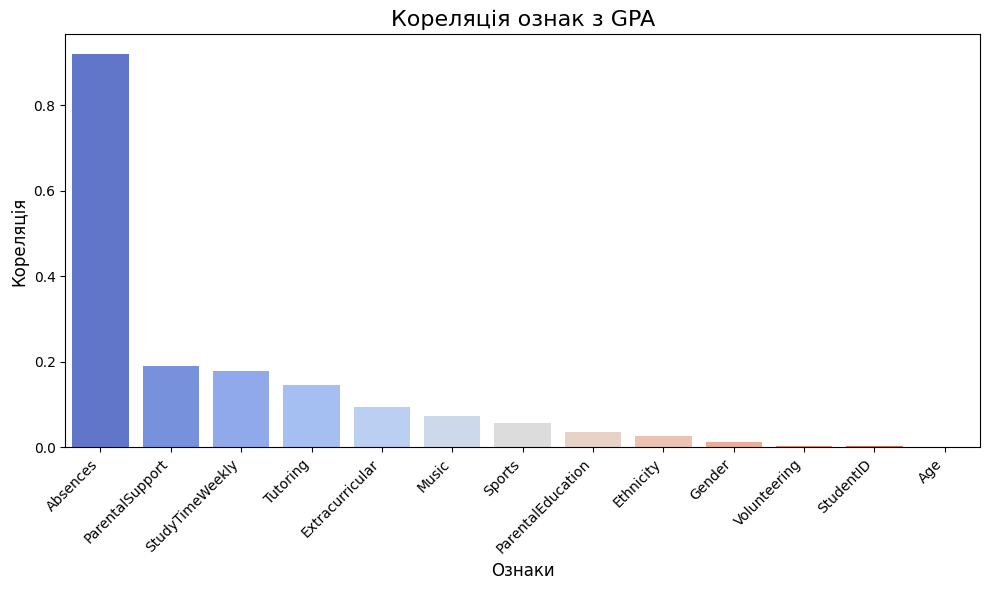

In [9]:
corr_vector = corr_vector.abs().sort_values(ascending=False) # приведемо значення до модуля
corr_vector = corr_vector.drop(['GPA', 'GradeClass']) # видалимо кореляцію з самою собою та з ознакою GradeClass

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_vector.index, y=corr_vector.values, palette='coolwarm')
plt.title('Кореляція ознак з GPA', fontsize=16)
plt.xlabel('Ознаки', fontsize=12)
plt.ylabel('Кореляція', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

можемо побачити що такі параметри як "кількість пропусків" має найбільший вплив на рейтинг успішності студента, також можемо виділити вплив таких значень, як "батьківська підтримка" та "час проведений за навчанням".

### видалимо стовпчик StudentID, адже він нам не потрібен для подальшої побудови моделі

In [10]:
dataFrame = dataFrame.drop(['StudentID'], axis=1)

dataFrame.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Крок 3

виконуємо задачу регресії, подудуємо модель прогнозування стовпця-результату "GPA"

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = dataFrame['GPA'] # це наш таргет
dataFrame = dataFrame.drop(['GPA'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(dataFrame, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dataFrame = scaler.fit_transform(dataFrame)

### Лінійна регресія

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linReg = LinearRegression()
linReg.fit(X_train, y_train)

y_pred = linReg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}\nR2: {r2}')

MSE: 0.03569628066412172
R2: 0.9568329026350805


### Рідж регресія

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Найкращі параметри: {ridge_grid.best_params_}\nMSE: {mse}\nR2: {r2}')

Найкращі параметри: {'alpha': 0.1, 'solver': 'saga'}
MSE: 0.03569737545641593
R2: 0.9568315787154822


### Gradient Boosting Regression

In [14]:
# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor()
# gbr_params = {
#     'n_estimators': [50, 100, 200],  # кількість дерев у моделі
#     'learning_rate': [0.01, 0.1, 0.2],  # швидкість навчання
#     'max_depth': [3, 4, 5],  # максимальна глибина кожного дерева
#     'subsample': [0.8, 1.0],  # частка зразків для навчання кожного дерева
#     'min_samples_split': [2, 5, 10],  # мінімальна кількість зразків для поділу вузла
# }

# gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error')
# gbr_grid.fit(X_train, y_train)
# best_gbr = gbr_grid.best_estimator_

# y_pred = best_gbr.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Найкращі параметри: {gbr_grid.best_params_}\nMSE: {mse}\nR2: {r2}')

In [15]:
y_pred = linReg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linerial Regression\nMSE: {mse}\nR2: {r2}\n')

y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression\nMSE: {mse}\nR2: {r2}\n')

# y_pred = best_gbr.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Gradient Boosting Regression\nMSE: {mse}\nR2: {r2}\n')

Linerial Regression
MSE: 0.03569628066412172
R2: 0.9568329026350805

Ridge Regression
MSE: 0.03569737545641593
R2: 0.9568315787154822



Як бачимо, всі три регресійні моделі показали себе досить добре, кожна має результат в R2 ~0.95. Тому можна використовувати будь яку з вище створених

## Крок 4

кластеризуємо дані

In [16]:
scaler = StandardScaler()
dataFrame = scaler.fit_transform(dataFrame)

### визначимо оптимальну кількість кластерів

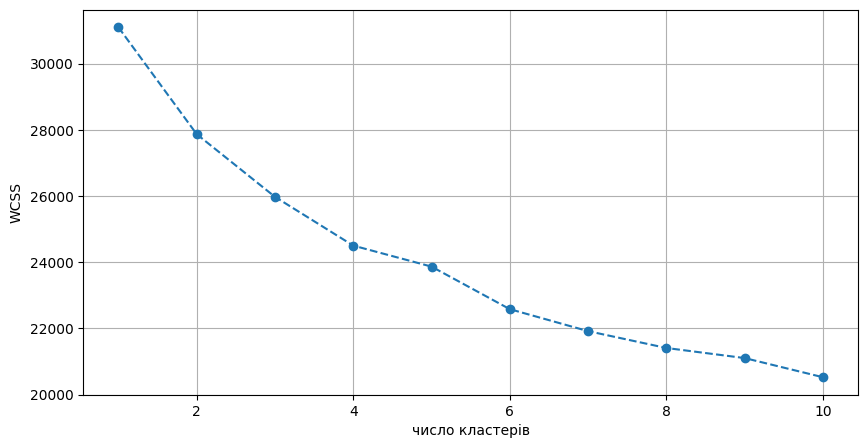

In [17]:
from sklearn.cluster import KMeans

wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    kmeans.fit(dataFrame)
    wcss_2d.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.xlabel('число кластерів')
plt.ylabel('WCSS')
plt.grid()
plt.show()

як такого, явного ліктя побачити ми не можемо, використаємо додатково метод силуетів

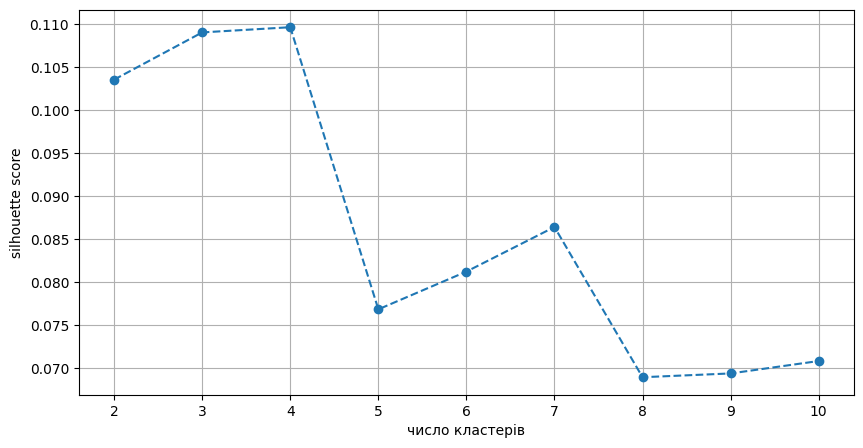

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
    cluster_labeles = kmeans.fit(dataFrame)
    silhouette_scores.append(silhouette_score(dataFrame, kmeans.labels_))


plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('число кластерів')
plt.ylabel('silhouette score')
plt.grid()
plt.show()

за методом ситуетів, можна вже більш точно сказати, що 3-4 кластери буде оптимальною кількістю

### візуалізуємо кластери даних

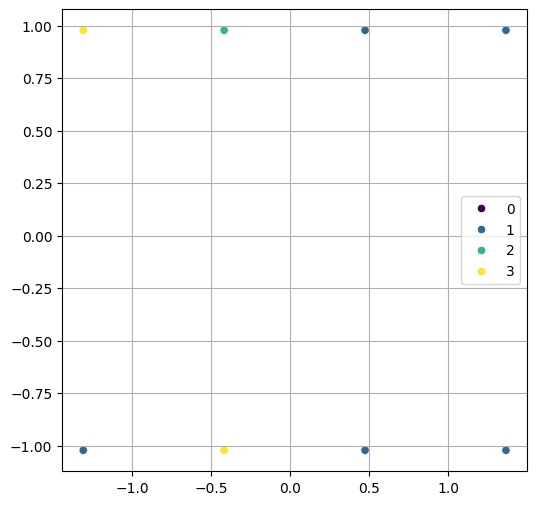

In [19]:
kMeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=100, random_state=42)
clusters = kMeans.fit_predict(dataFrame)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=dataFrame[:, 0], y=dataFrame[:, 1], hue=clusters, palette='viridis', legend='full')
plt.grid()
plt.show()